# Wine Quality Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

The dataset contains data related to wine. Here we have to predict the quality of wine based on different parameters like fixed acidity,volatile acidity, citric acid content, residual sugar and many others. Finally we have to check whether the quality of wine is good or not good(if quality of wine is 7 or above then it is considered as good quality and the remaining below 7 is considered as not good quality). So we can basically consider it as a binary classification project.

In [3]:
df.shape

(1599, 12)

This dataset has 1599 rows and 12 columns among which 11 columns are features and 1 is the label.

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [6]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [7]:
#Checking the datatypes of the columnns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We can see that all the columnns have float64 datatype and only the quality columnn have int64 datatype in it.

In [8]:
#Checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values are present in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This is a summary of the dataset which contains name of the columns, number of non null values, datatypes,memory usage,etc.

<Axes: >

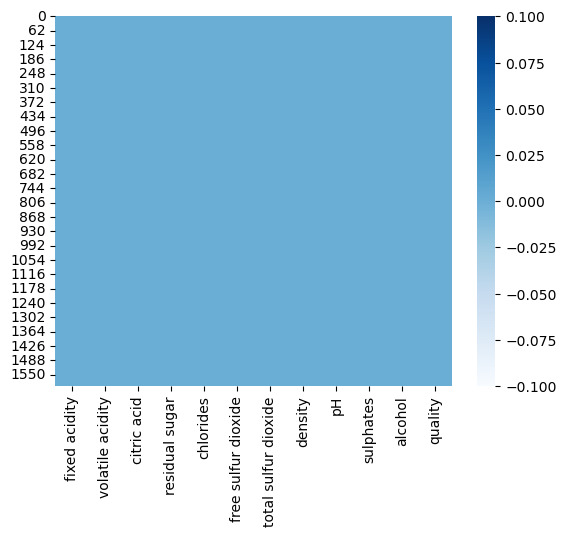

In [10]:
#Checking the null values in a graphical way
sns.heatmap(df.isnull(),cmap = 'Blues')

In [11]:
#Checking the number of unique values in all the columns
df.nunique().to_frame("No. of unique values")

No. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

Here in the quality column we have set a threshold value (i.e. 7) and the value of the quality which are greater than or equal to 7 that is of good quality and are replaced by 1 and the values which are less than 7 are not of good quality and are replaced by 0.

In [12]:
#description of the dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there are no negative or invalid values present. Here in almost all columns the mean values and median are nearer to each other so there is not much skewness in the dataset. We can see a huge difference between the 75% and the max. in some of the columnns. So outliers may be present there.

# Data Visualization

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


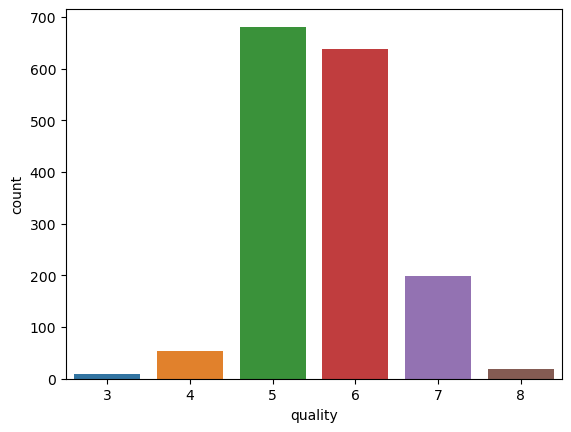

In [13]:
ax = sns.countplot(x = 'quality', data = df)
print (df['quality']. value_counts())

Here we can see that the 5 and 6 quality of wine are in maximum numbers.

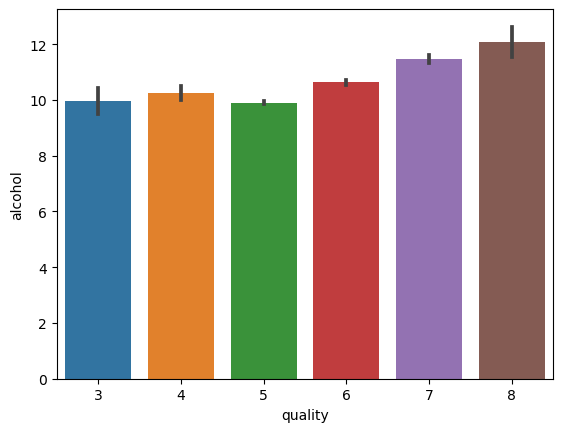

In [25]:
# plotting graph between alchohl and quality
sns.barplot(x = 'quality', y = 'alcohol', data =df)
plt.show()

Here we can see that the alcohol content and wine quality are directly proportional to each other. The quality of the wine is increasing with the increase in alcohol content.

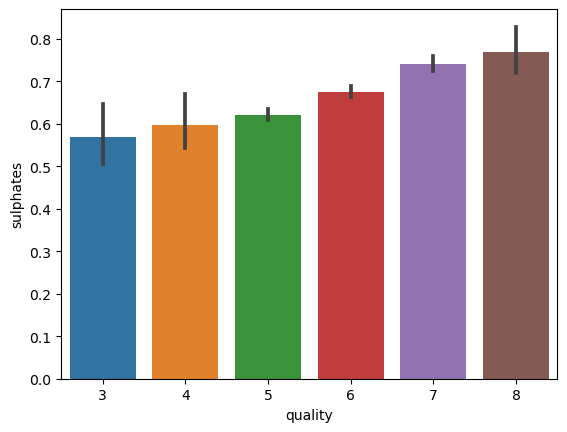

In [26]:
# Comparison between sulphates and quality
sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.show()

We can see that the quality of wine increases with the increase in sulphate content. 

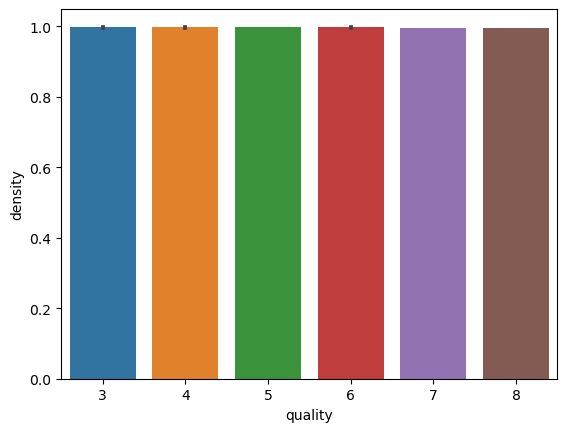

In [27]:
# comparison between Quality and Density
sns.barplot(x = 'quality', y = 'density', data = df)
plt.show()

We can't find a significant relation between the quality and density from the above graph.

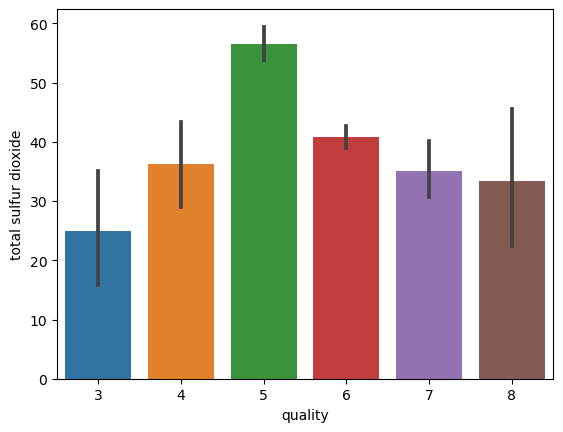

In [28]:
# Comparison between quality and total sulphur dioxide
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)
plt.show()

We can see that in quality 5 and 6 there is the maximum sulfur dioxide present.

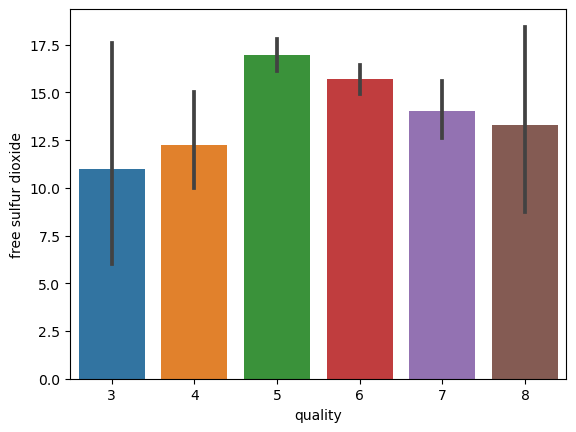

In [29]:
#Comparison between quality and free sulfur dioxide
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)
plt.show()

here also we can see that the quality 5 and 6 wine has the maximum free sulfur dioxide present.

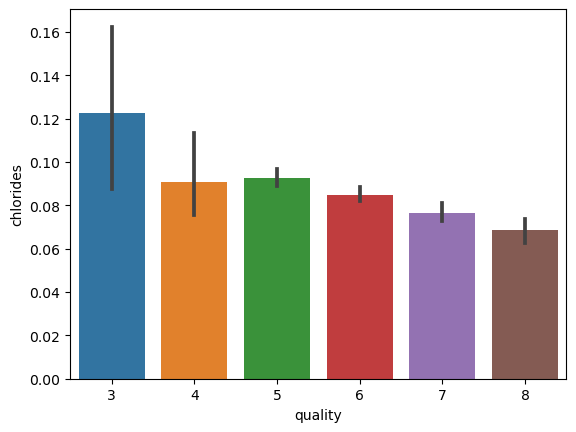

In [30]:
# Comparison between quality and chlorides
sns.barplot(x = 'quality', y = 'chlorides', data = df)
plt.show()

We can see a negative relation between the chlorides and quality.

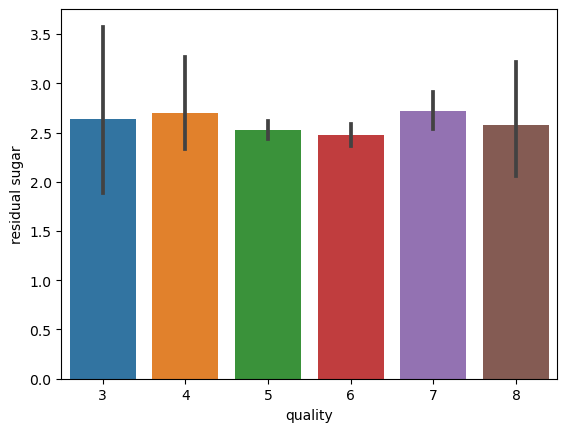

In [31]:
# comparison between quality and residual sugar
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
plt.show()

The quality 5 and 6 have the lowest residual sugar in it.

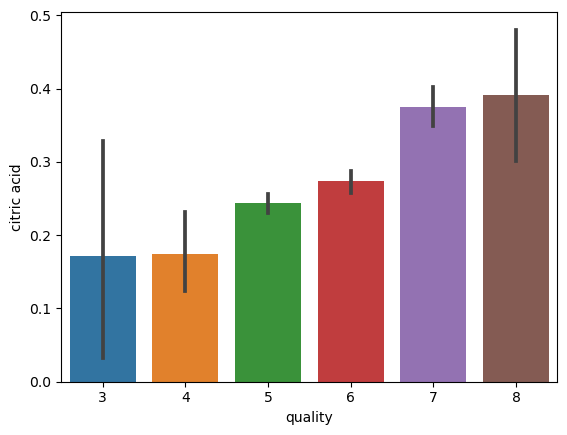

In [32]:
# Comparison between quality and citric acid
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.show()

The citric acid is directly proportional to quality.

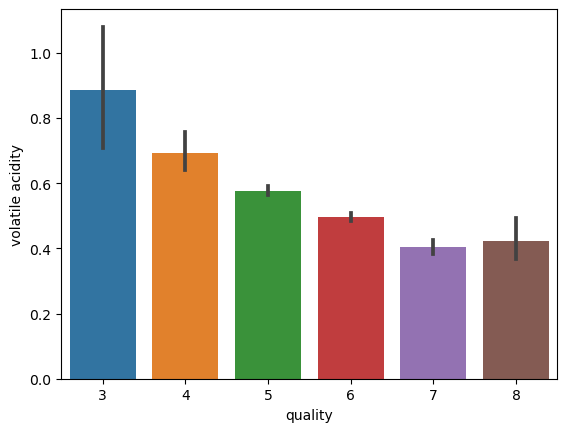

In [33]:
# Comparison between quality and volatile acidity
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
plt.show()

The quality of the wine increases by the decreasing in volatile acidity.

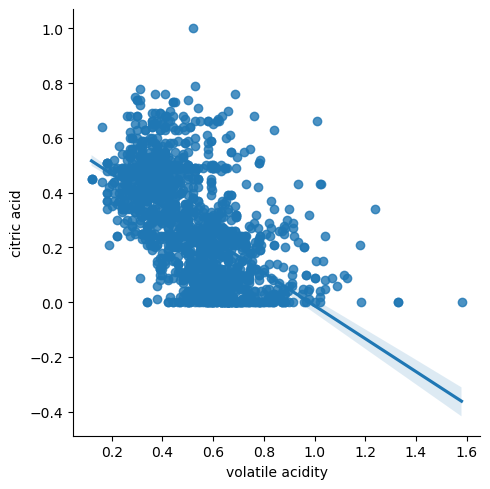

In [34]:
#comparing volatile acidity with citric acid
sns.lmplot(x= 'volatile acidity', y = 'citric acid', data = df)
plt.show()

The volatile acidity and the citric acid are negatively related with each other.

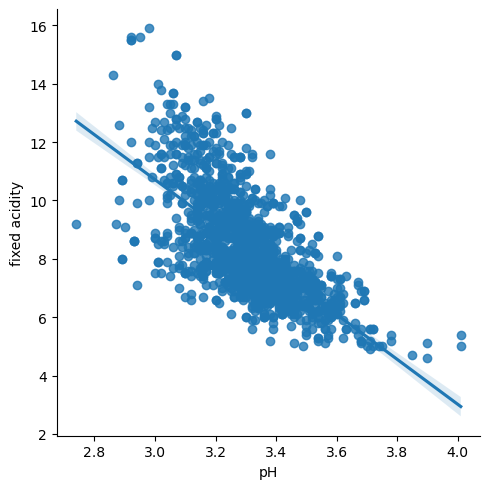

In [35]:
sns.lmplot(x = 'pH', y = 'fixed acidity', data = df)
plt.show()

pH and fixed acidity are negatively correlated with each other.

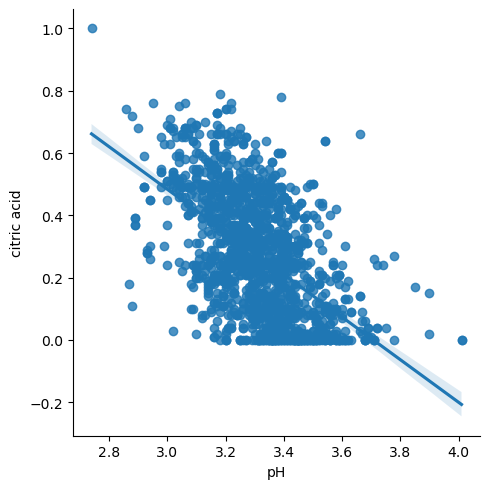

In [36]:
sns.lmplot(x = 'pH', y = 'citric acid', data = df)
plt.show()

pH has a negative relation with citric acid

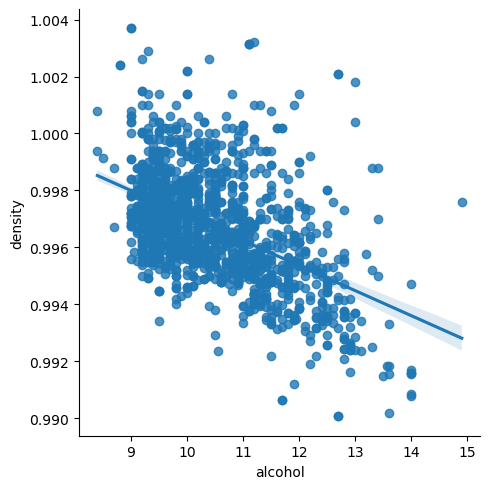

In [37]:
sns.lmplot(x = 'alcohol', y = 'density', data = df)
plt.show()

Alcohol has anegative relation with density.

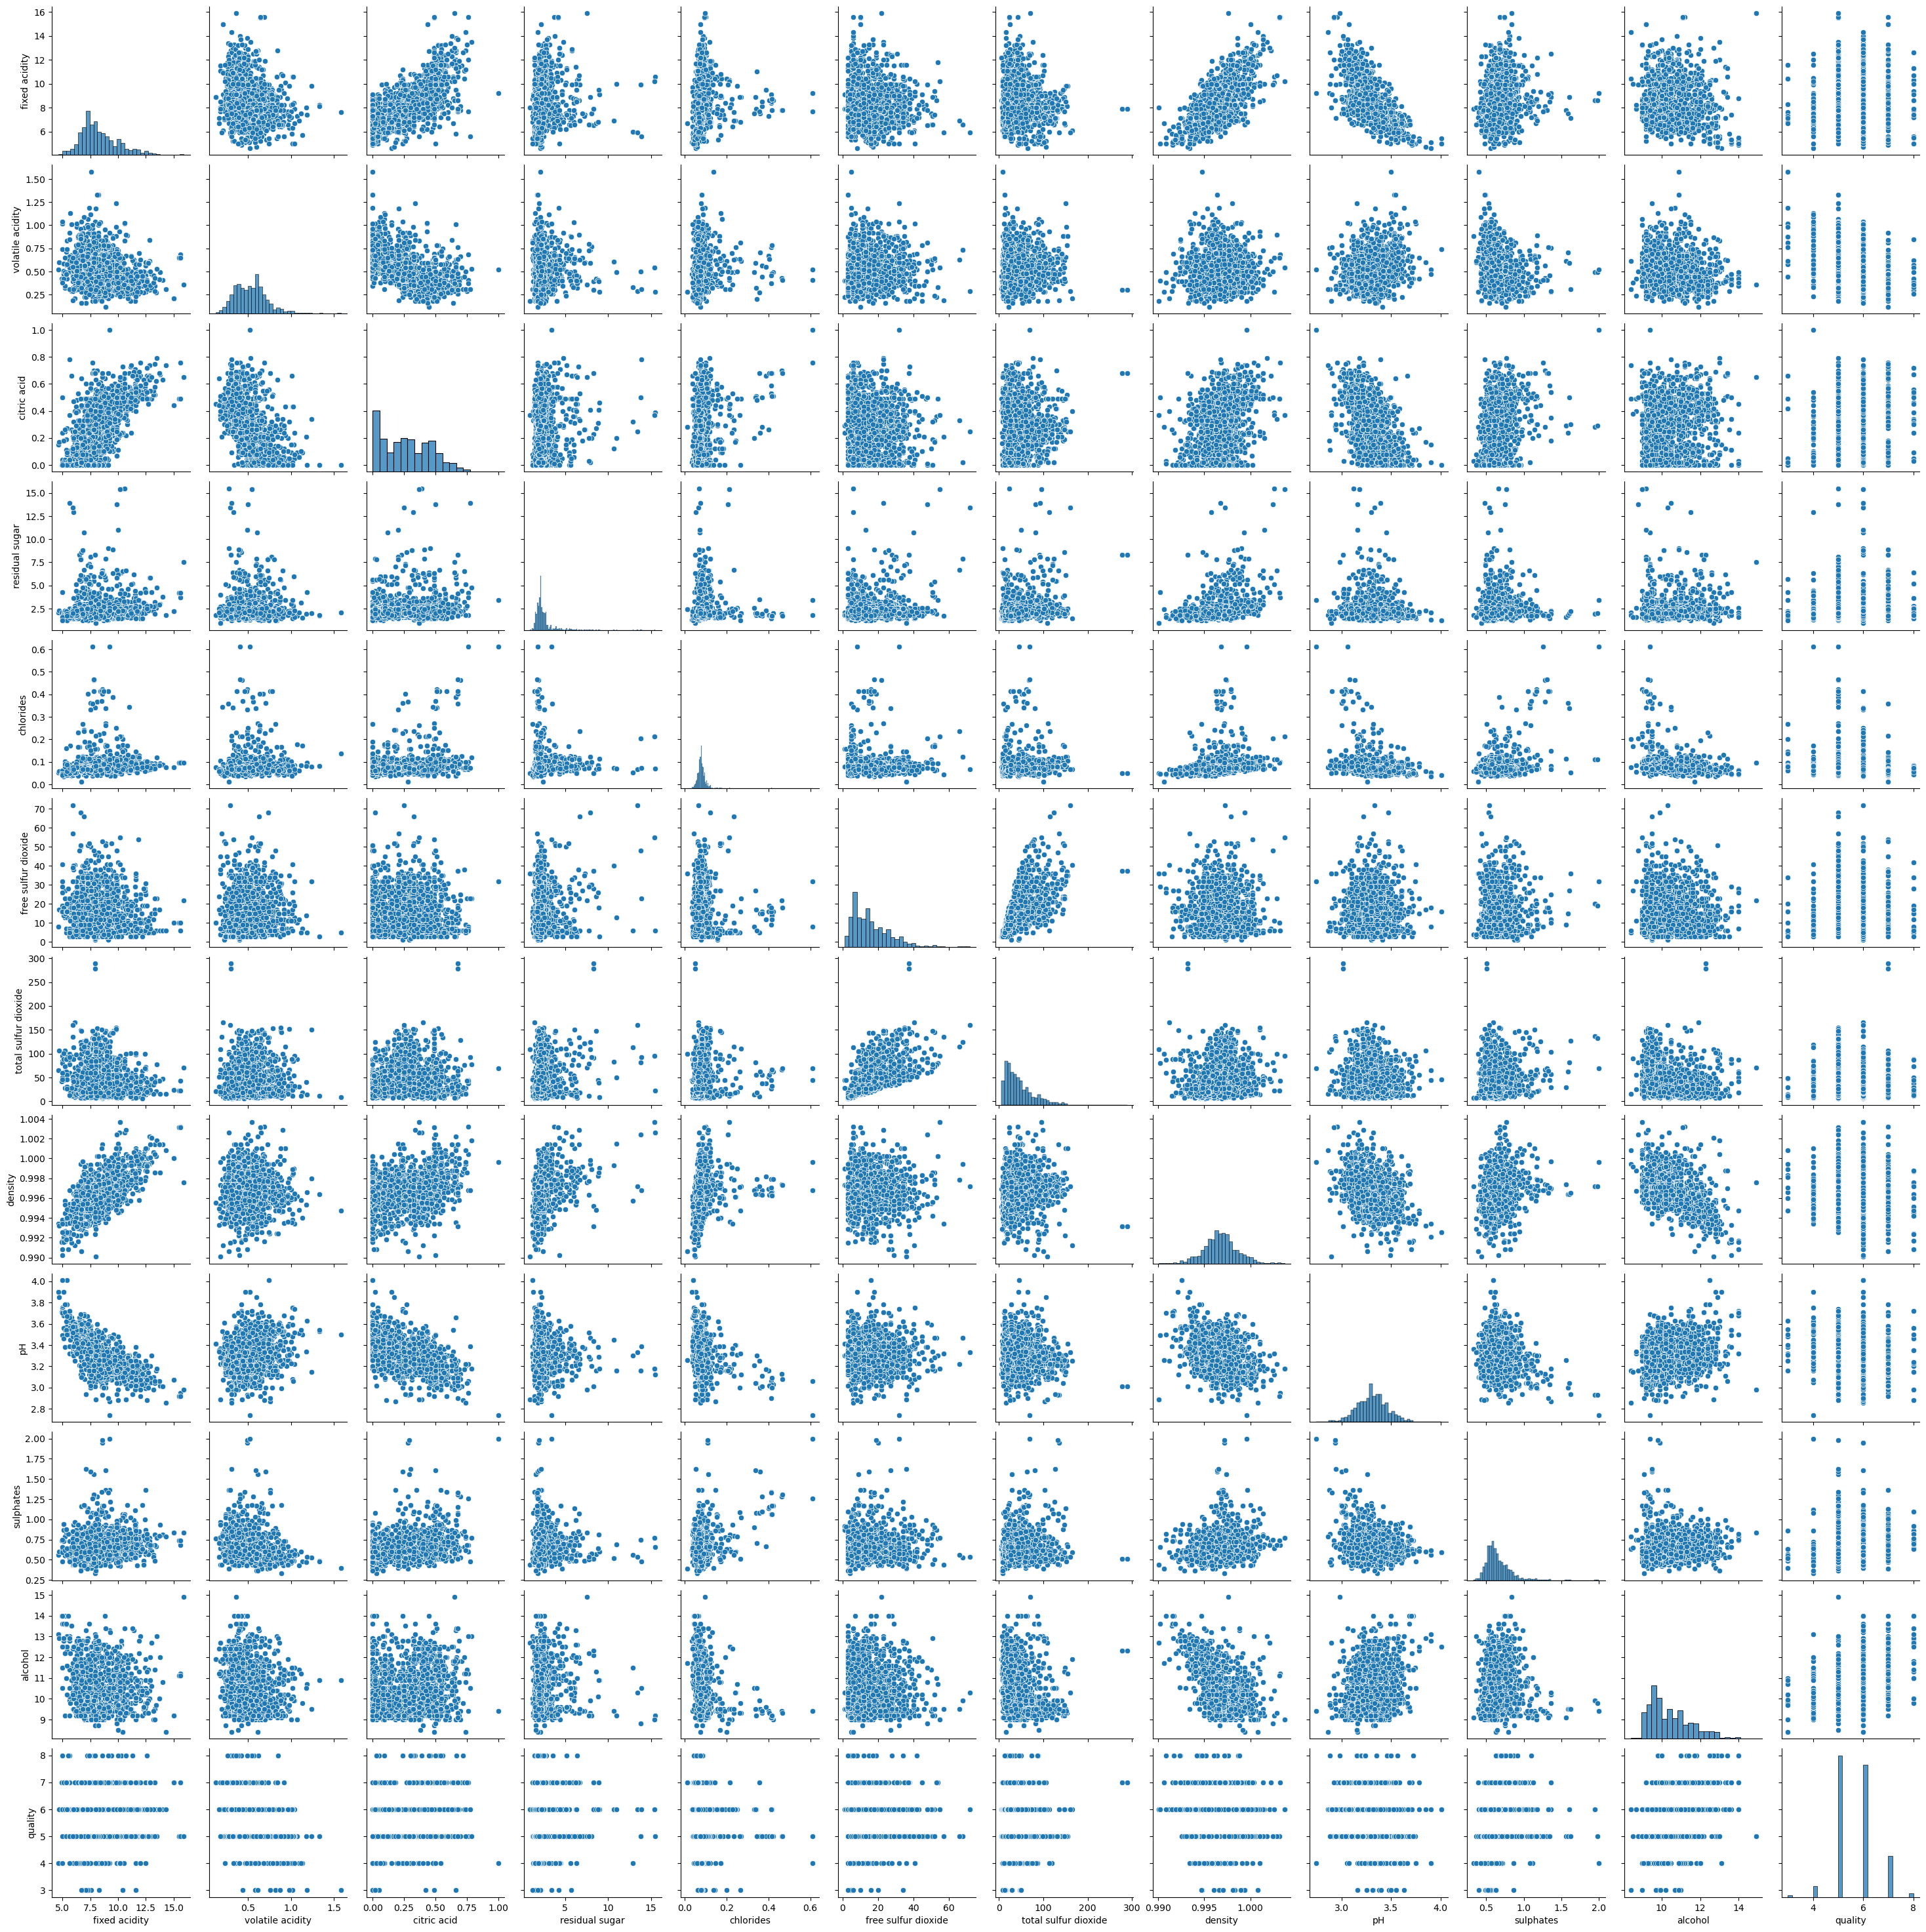

In [38]:
sns.pairplot (df, palette = "Dark2")
plt.show()

This plot shows a pairwise relation between the all the features.

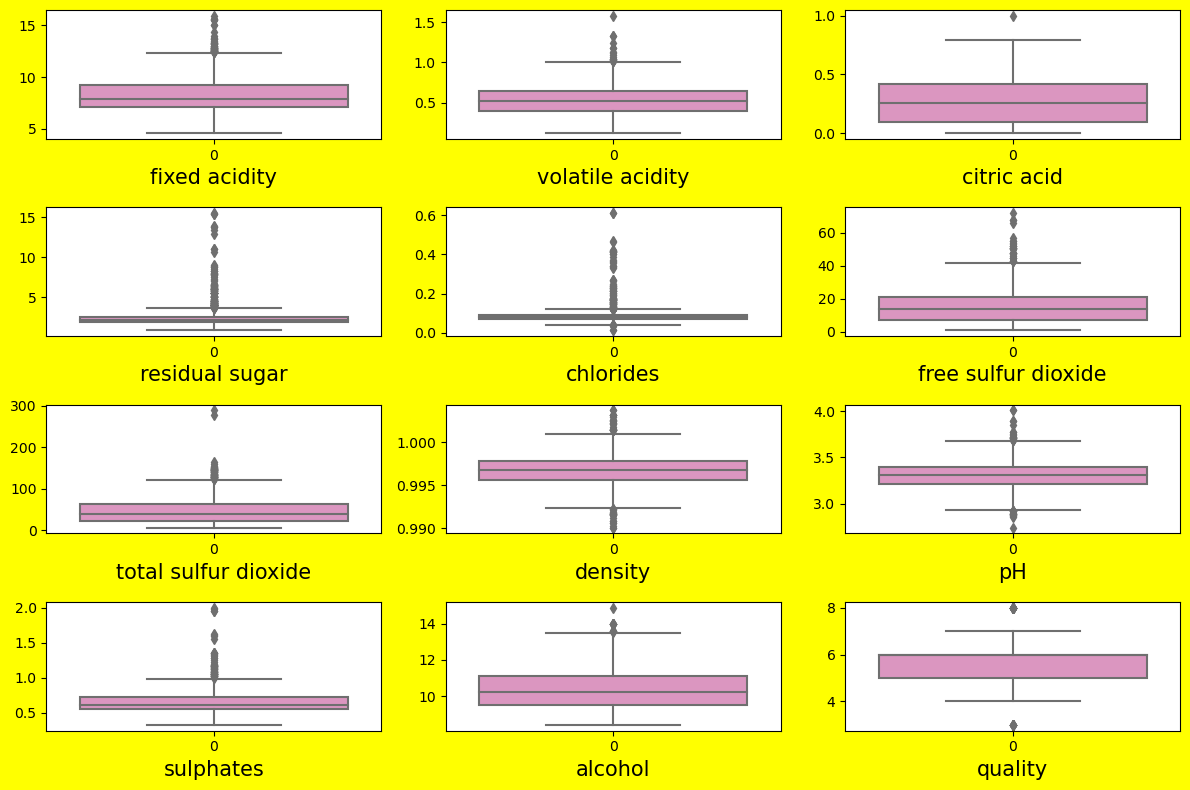

In [39]:
plt.figure(figsize = (12,8), facecolor = 'yellow')
plotnumber = 1
for col in df.columns:
    if plotnumber<=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
    plotnumber+=1
plt.tight_layout()

We can see outliers present in all columns. so we have to remove it.

In [40]:
# Detecting outliers by z score method
from scipy.stats import zscore
out_features = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
z = np.abs(zscore(out_features))

z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol  
0      0.579207  0.960246  
1      0.128950  0.584777  
2      0.048089  0.584777  
3      0.461180  0.584777  
4      0.579207  0.960246  
...         ...       ...  
1594   0.461180  0.072294  
1595   0.601055  0.729364  
1596   0.542042  0.541630  
1597   0.305990  0.209308  
1598   0.010924  0.541630  

[1599 rows x 11 columns]

In [41]:
# threshold = 3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [42]:
# to cross verify the z score of a particular row and column having z score greater than 3
z.iloc[13,9]

5.32210116796055

In [43]:
# now removing all the data having z score above the threshold and creating a new dataframe
df1 = df[(z<3).all(axis = 1)]

df1.shape

(1458, 12)

In [44]:
df.shape

(1599, 12)

In [45]:
print("Data loss percentage- ",((df.shape[0]-df1.shape[0])/df.shape[0])*100,'%')

Data loss percentage-  8.818011257035648 %


In [46]:
#Detecting outliers by IQR method
Q1=out_features.quantile(0.25)

Q3=out_features.quantile(0.75)

IQR=Q3 - Q1

df2 = df[~((df < (Q1-1.5*IQR)) | (df> (Q3 + 1.5* IQR))).any(axis = 1)]

In [47]:
df2.shape

(1194, 12)

In [48]:
print("Data loss percentage in IQR- ",((df.shape[0]-df2.shape[0])/df.shape[0])*100,'%')

Data loss percentage in IQR-  25.328330206378986 %


As data loss percentage is low in removing outliers in z score method, so we will use z score method for the  removal of outliers.

In [49]:
df = df1

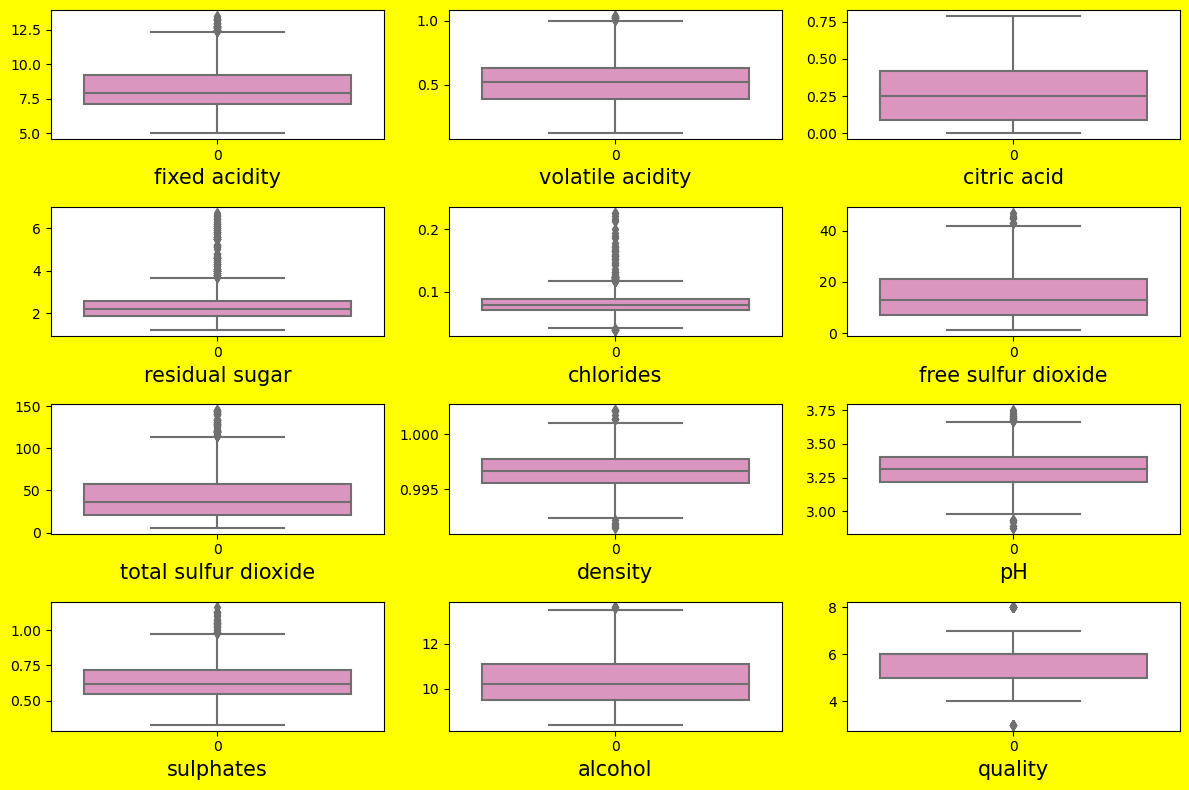

In [50]:
plt.figure(figsize = (12,8), facecolor = 'yellow')
plotnumber = 1
for col in df.columns:
    if plotnumber<=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
    plotnumber+=1
plt.tight_layout()

here we can see that still some ooutliers are present in the dataset. Let's further proceed with this

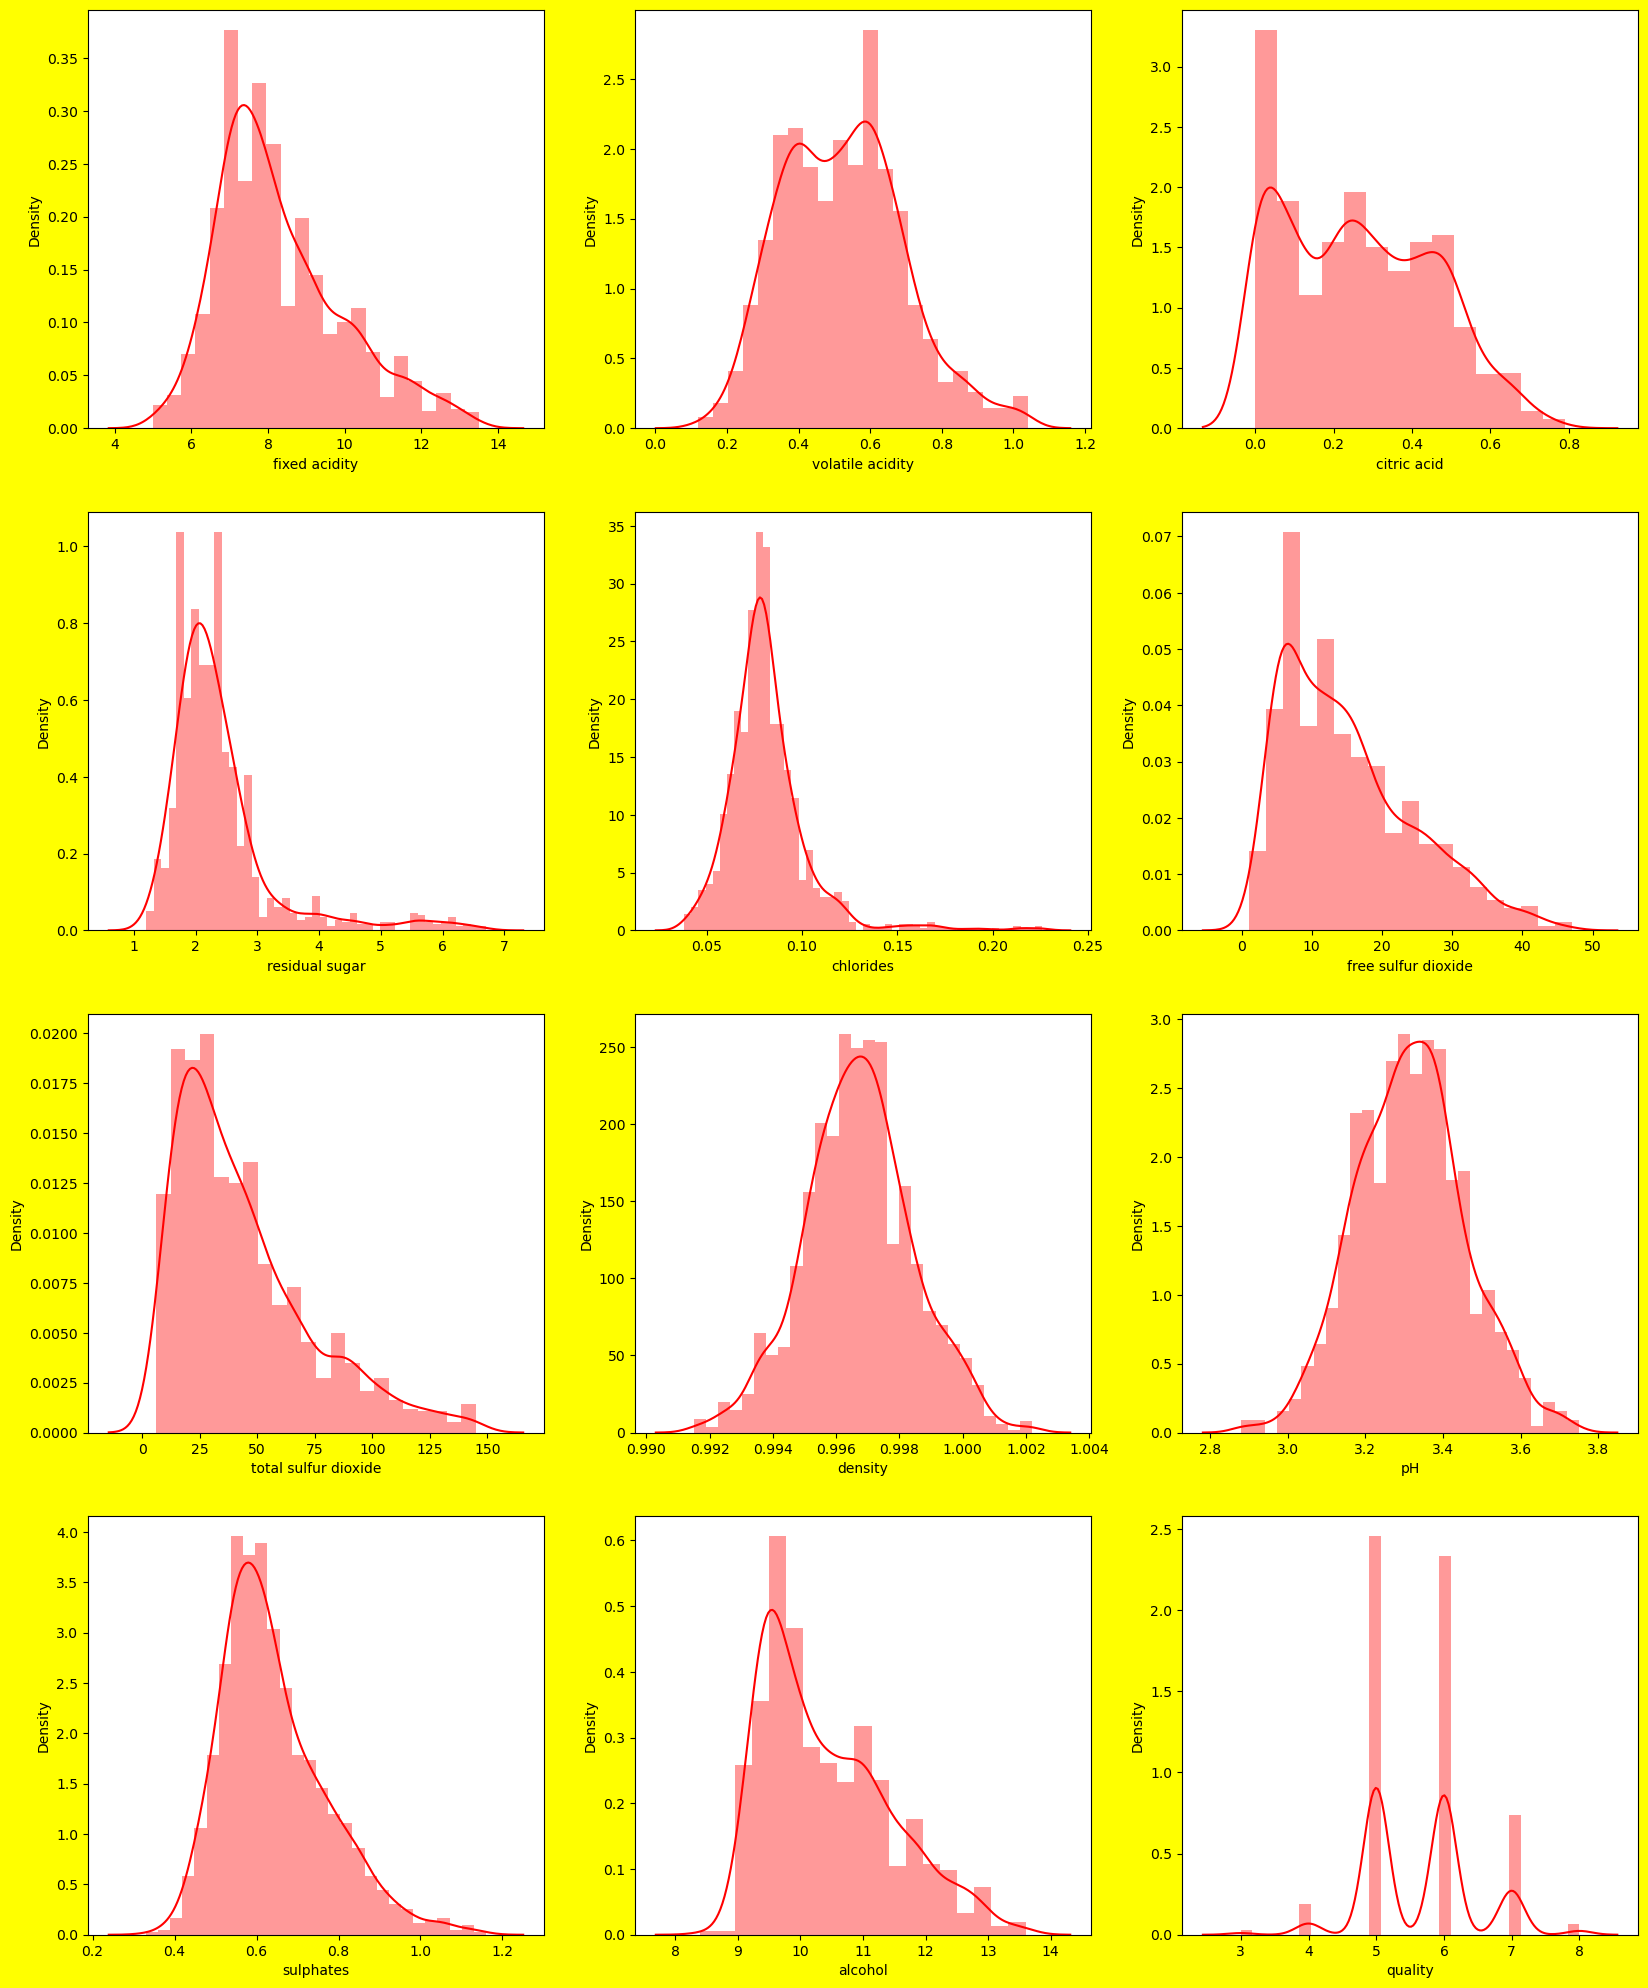

In [51]:
#Checking the distribution of data in each column
plt.figure(figsize = (20,25), facecolor = 'yellow')
p = 1
for i in df:
    if p<=12:
        ax= plt.subplot(4,3,p)
        sns.distplot(df[i],color = 'r')
        p+=1
plt.show()

From the above distribution plots we can see that the data almost looks normal in some column and in some there are some skewness.


In [52]:
# Checking for skewness
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

In [53]:
df[['fixed acidity','free sulfur dioxide','total sulfur dioxide','residual sugar','chlorides','sulphates','alcohol']] =np.log(df[['fixed acidity','free sulfur dioxide','total sulfur dioxide','residual sugar','chlorides','sulphates','alcohol']])

In [54]:
df.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.588835
quality                 0.248823
dtype: float64

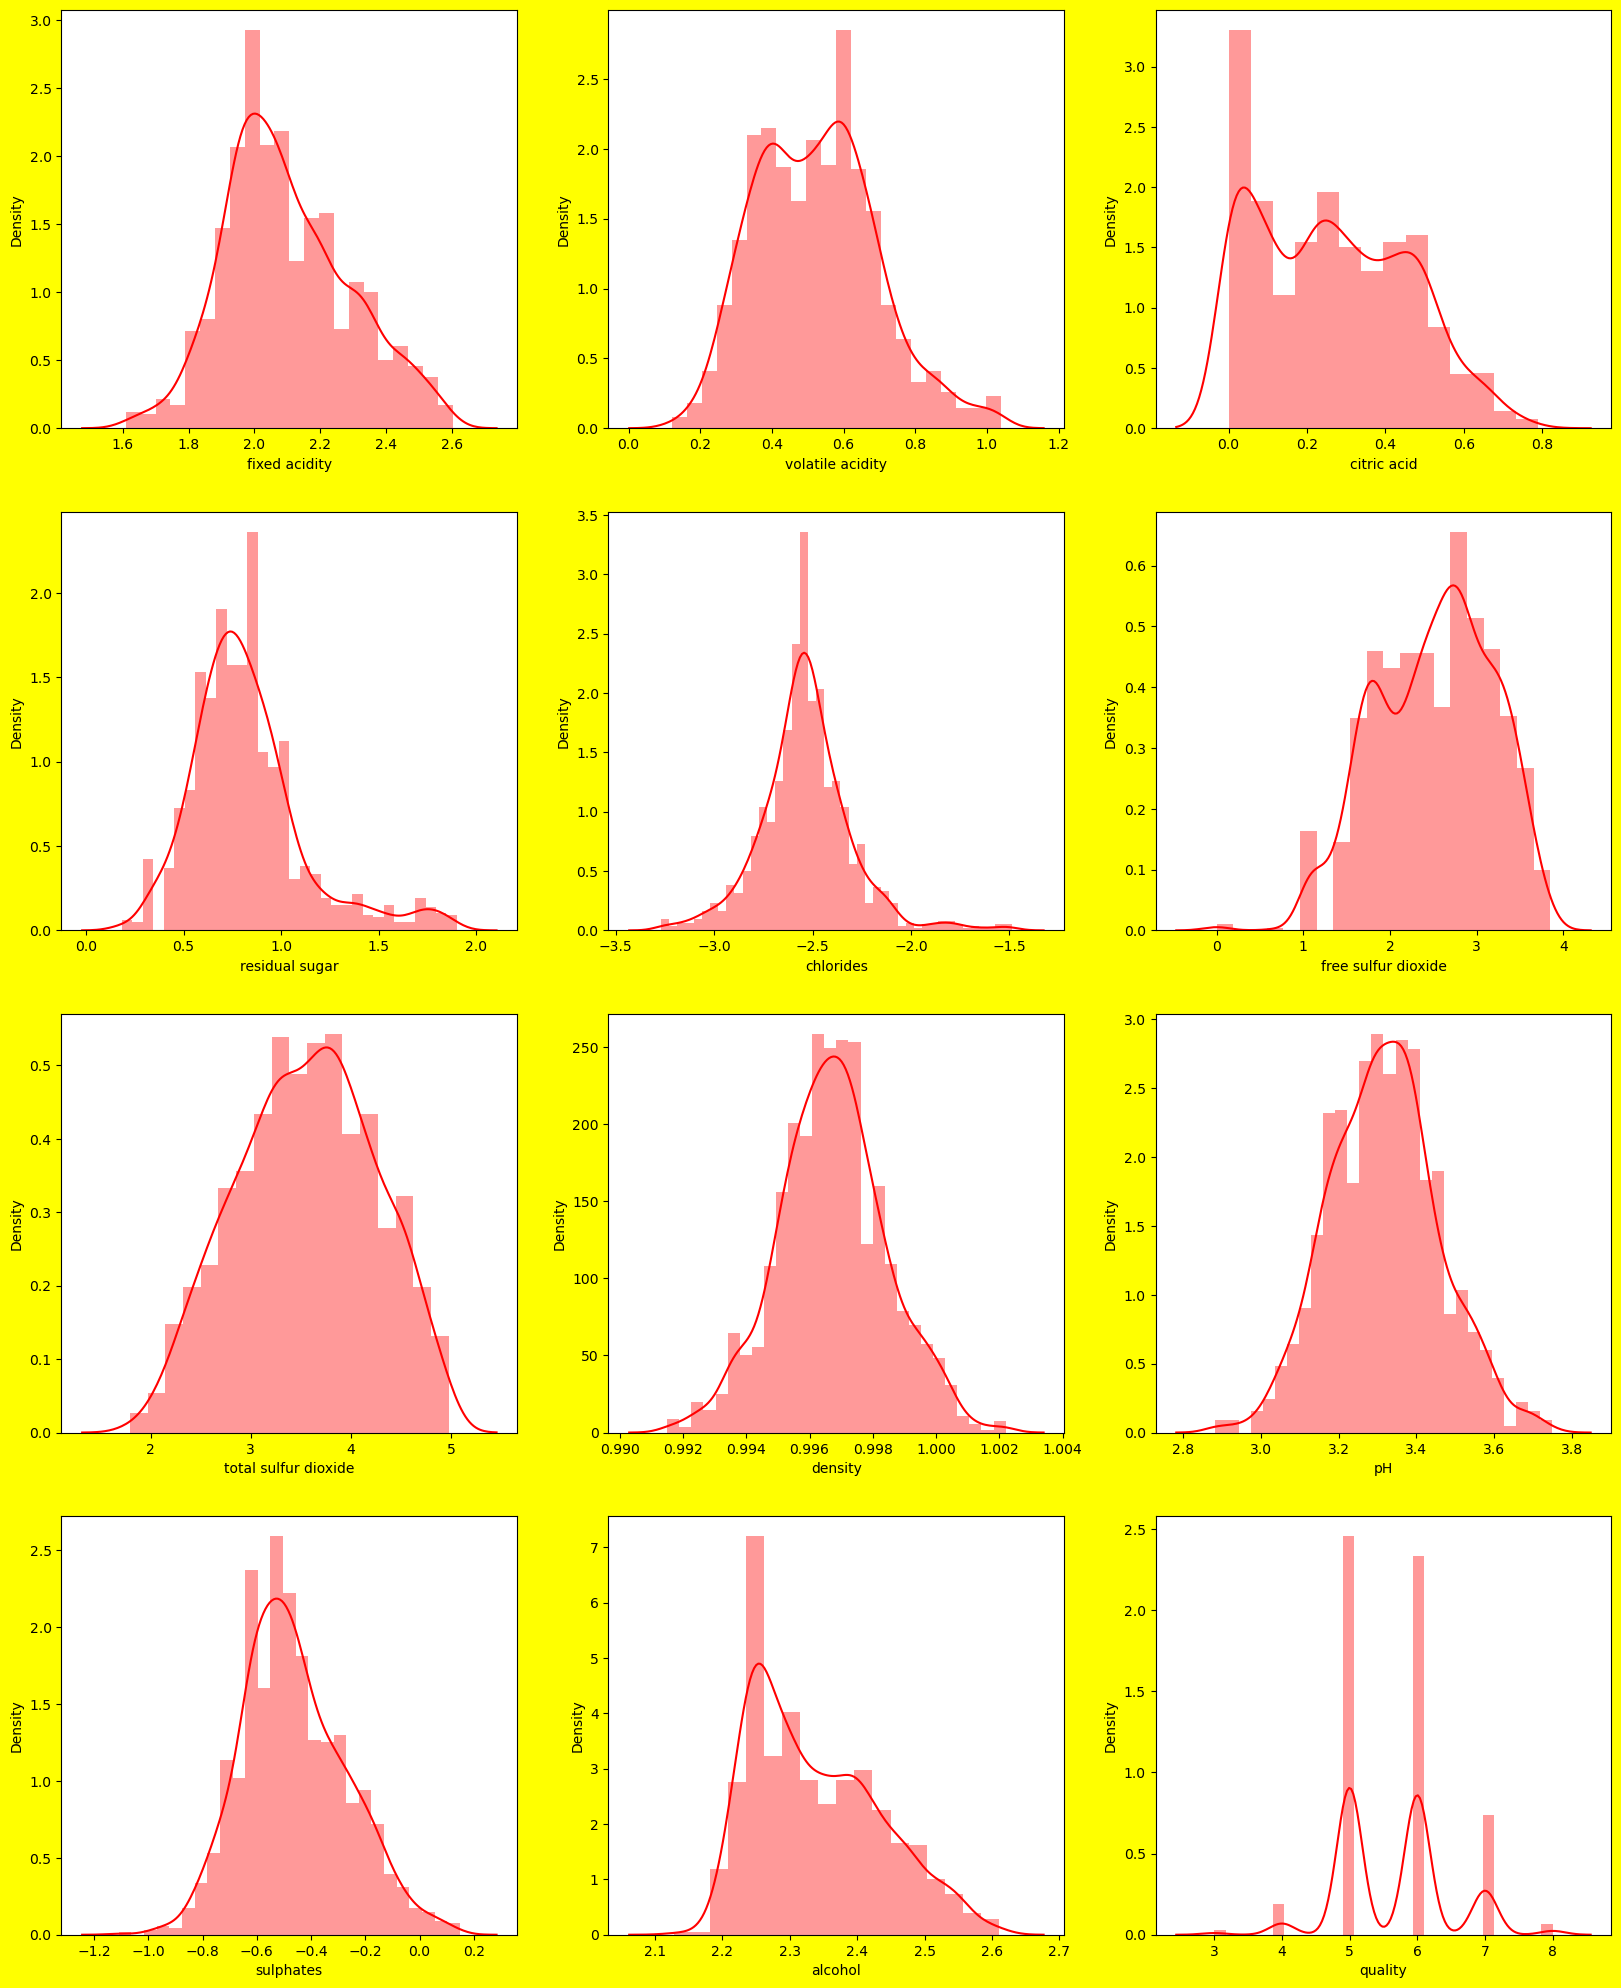

In [55]:
plt.figure(figsize = (20,25), facecolor = 'yellow')
p = 1
for i in df:
    if p<=12:
        ax= plt.subplot(4,3,p)
        sns.distplot(df[i],color = 'r')
        p+=1
plt.show()

from the above distribution graph we can see that almost all the data are normally distributed.

In [56]:
#Checking the correlation between features
cor = df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.295813     0.692400   
volatile acidity          -0.295813          1.000000    -0.589286   
citric acid                0.692400         -0.589286     1.000000   
residual sugar             0.204999          0.036963     0.188923   
chlorides                  0.232103          0.079752     0.104443   
free sulfur dioxide       -0.170132          0.046278    -0.107676   
total sulfur dioxide      -0.096951          0.099221    -0.027290   
density                    0.664021         -0.000446     0.372338   
pH                        -0.721165          0.252900    -0.521270   
sulphates                  0.190975         -0.356126     0.308570   
alcohol                   -0.039221         -0.212932     0.163495   
quality                    0.129743         -0.362783     0.238244   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.204999   0.232103            -0.170132   
volatile acidity            0.036963   0.079752             0.046278   
citric acid                 0.188923   0.104443            -0.107676   
residual sugar              1.000000   0.184832             0.011565   
chlorides                   0.184832   1.000000            -0.030588   
free sulfur dioxide         0.011565  -0.030588             1.000000   
total sulfur dioxide        0.098075   0.077908             0.778888   
density                     0.383786   0.393204            -0.041086   
pH                         -0.077378  -0.202248             0.132344   
sulphates                   0.067932   0.002094             0.045477   
alcohol                     0.162090  -0.259783            -0.091476   
quality                     0.050656  -0.146522            -0.063639   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.096951  0.664021 -0.721165   0.190975   
volatile acidity                  0.099221 -0.000446  0.252900  -0.356126   
citric acid                      -0.027290  0.372338 -0.521270   0.308570   
residual sugar                    0.098075  0.383786 -0.077378   0.067932   
chlorides                         0.077908  0.393204 -0.202248   0.002094   
free sulfur dioxide               0.778888 -0.041086  0.132344   0.045477   
total sulfur dioxide              1.000000  0.140454  0.032708   0.006369   
density                           0.140454  1.000000 -0.311217   0.133096   
pH                                0.032708 -0.311217  1.000000  -0.025521   
sulphates                         0.006369  0.133096 -0.025521   1.000000   
alcohol                          -0.267830 -0.465070  0.137757   0.253730   
quality                          -0.190809 -0.177758 -0.084922   0.394973   

                       alcohol   quality  
fixed acidity        -0.039221  0.129743  
volatile acidity     -0.212932 -0.362783  
citric acid           0.163495  0.238244  
residual sugar        0.162090  0.050656  
chlorides            -0.259783 -0.146522  
free sulfur dioxide  -0.091476 -0.063639  
total sulfur dioxide -0.267830 -0.190809  
density              -0.465070 -0.177758  
pH                    0.137757 -0.084922  
sulphates             0.253730  0.394973  
alcohol               1.000000  0.497173  
quality               0.497173  1.000000

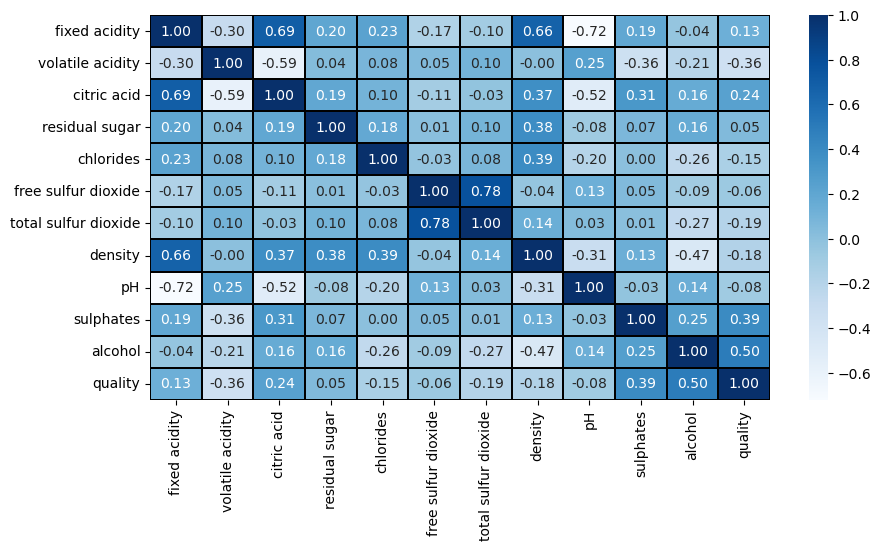

In [57]:
#Checking the correlation between thhe features by heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), linewidths = 0.1, linecolor = 'black', cmap = 'Blues', annot = True, fmt ='.2f')
plt.show()

In [58]:
#0- no correlation, -0.3 to +0.3- less correlation, greater than -0.5 or greater than +0.5 - moderate correlation, greater than -0.7 or grreater than +0.7 high correlation.

From the above heatmap we can see that:
1. Some features are positively correlated and some features are negatively correlated to the target .
2. Fixed acidity, Citric acid, residual sugar, sulphates and alcohol are positively correlated to the target variable that is quality and the rest others are negatively correlated with the target variable.
3. Free sulphur dioxide and total sulful dioxide, citric acid and fixed acidity,pH and fixed acidity  have a high correlation with each other

In [59]:
# setting a threshold value of 7 for the quality column (if the value >= 7 then it is of good quality and denoted as 1 ; if it is < 7 then it is of not good quality and is denoted as 0)
for i, row in df.iterrows():
    if df.loc[i, 'quality'] >=7:
        df.at[i,'quality'] = 1
    else:
        df.at[i,'quality'] = 0

In [60]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480             0.700         0.00        0.641854  -2.577022   
1          2.054124             0.880         0.00        0.955511  -2.322788   
2          2.054124             0.760         0.04        0.832909  -2.385967   
3          2.415914             0.280         0.56        0.641854  -2.590267   
4          2.001480             0.700         0.00        0.641854  -2.577022   
...             ...               ...          ...             ...        ...   
1594       1.824549             0.600         0.08        0.693147  -2.407946   
1595       1.774952             0.550         0.10        0.788457  -2.780621   
1596       1.840550             0.510         0.13        0.832909  -2.577022   
1597       1.774952             0.645         0.12        0.693147  -2.590267   
1598       1.791759             0.310         0.47        1.280934  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.397895              3.526361  0.99780  3.51  -0.579818   
1                3.218876              4.204693  0.99680  3.20  -0.385662   
2                2.708050              3.988984  0.99700  3.26  -0.430783   
3                2.833213              4.094345  0.99800  3.16  -0.544727   
4                2.397895              3.526361  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594             3.465736              3.784190  0.99490  3.45  -0.544727   
1595             3.663562              3.931826  0.99512  3.52  -0.274437   
1596             3.367296              3.688879  0.99574  3.42  -0.287682   
1597             3.465736              3.784190  0.99547  3.57  -0.342490   
1598             2.890372              3.737670  0.99549  3.39  -0.415515   

       alcohol  quality  
0     2.240710        0  
1     2.282382        0  
2     2.282382        0  
3     2.282382        0  
4     2.240710        0  
...        ...      ...  
1594  2.351375        0  
1595  2.415914        0  
1596  2.397895        0  
1597  2.322388        0  
1598  2.397895        0  

[1458 rows x 12 columns]

In [61]:
#Separating the independent and target variables into x and y
x = df.drop("quality", axis = 1)
y = df["quality"]

print("Feature dimension =",x.shape)
print("Label dimension =",y.shape)

Feature dimension = (1458, 11)
Label dimension = (1458,)


In [62]:
y.value_counts()

0    1257
1     201
Name: quality, dtype: int64

we can see in the target variable there is a case of class imbalance. we will solve this issue by oversampling.

In [63]:
# feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.513603          1.038708    -1.387413       -0.621768  -0.181052   
1         -0.237021          2.101325    -1.387413        0.456376   0.915970   
2         -0.237021          1.392914    -1.178214        0.034952   0.643353   
3          1.663763         -1.440732     1.541370       -0.621768  -0.238205   
4         -0.513603          1.038708    -1.387413       -0.621768  -0.181052   
...             ...               ...          ...             ...        ...   
1453      -1.443167          0.448365    -0.969015       -0.445456   0.548514   
1454      -1.703741          0.153194    -0.864416       -0.117843  -1.059583   
1455      -1.359104         -0.082944    -0.707517        0.034952  -0.181052   
1456      -1.703741          0.714019    -0.759816       -0.445456  -0.238205   
1457      -1.615439         -1.263630     1.070673        1.574960  -0.724919   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.168720             -0.040631  0.629873  1.374768   
1                1.063700              0.953215  0.047678 -0.823752   
2                0.296871              0.637173  0.164117 -0.398232   
3                0.484760              0.791541  0.746312 -1.107432   
4               -0.168720             -0.040631  0.629873  1.374768   
...                   ...                   ...       ...       ...   
1453             1.434275              0.337123 -1.058494  0.949248   
1454             1.731243              0.553429 -0.930411  1.445688   
1455             1.286501              0.197481 -0.569449  0.736488   
1456             1.434275              0.337123 -0.726642  1.800288   
1457             0.570564              0.268965 -0.714998  0.523728   

      sulphates   alcohol  
0     -0.609543 -1.030072  
1      0.392467 -0.592859  
2      0.159607 -0.592859  
3     -0.428442 -0.592859  
4     -0.609543 -1.030072  
...         ...       ...  
1453  -0.428442  0.130987  
1454   0.966486  0.808099  
1455   0.898129  0.619056  
1456   0.615272 -0.173139  
1457   0.238400  0.619056  

[1458 rows x 11 columns]

In [64]:
#Checking variance inflation factor(VIF) for checking multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif[" Features"] = x.columns

vif

VIF values              Features
0     7.970581         fixed acidity
1     1.842977      volatile acidity
2     3.069527           citric acid
3     1.773929        residual sugar
4     1.233243             chlorides
5     2.863860   free sulfur dioxide
6     3.161391  total sulfur dioxide
7     6.714040               density
8     3.365932                    pH
9     1.354603             sulphates
10    3.276315               alcohol

here vif values for the features are normal no issue of multicolinearity.

### Handeling class imbalance issue of the target variable

In [65]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [66]:
y1.value_counts()

0    1257
1    1257
Name: quality, dtype: int64

So, we have resolved the class imbalance issue here.

## Modelling

### Finding the best random state


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
maxAccu = 0
maxRS = 0

for i in range(1, 200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state =i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)   

Best accuracy is 0.9642384105960264 at random_state 17


In [68]:
#Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state = maxRS)

## Classification algorithms

In [70]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

### Random  forest classifier

In [71]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9615894039735099
[[346  23]
 [  6 380]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       369
           1       0.94      0.98      0.96       386

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



### Logistic regression

In [72]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8304635761589404
[[288  81]
 [ 47 339]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       369
           1       0.81      0.88      0.84       386

    accuracy                           0.83       755
   macro avg       0.83      0.83      0.83       755
weighted avg       0.83      0.83      0.83       755



### Support vector classifier

In [73]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8980132450331125
[[308  61]
 [ 16 370]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       369
           1       0.86      0.96      0.91       386

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755



### Gradient boosting classifier

In [74]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.919205298013245
[[319  50]
 [ 11 375]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       369
           1       0.88      0.97      0.92       386

    accuracy                           0.92       755
   macro avg       0.92      0.92      0.92       755
weighted avg       0.92      0.92      0.92       755



### Ada Boost classifier

In [75]:
ABC = AdaBoostClassifier()
ABC.fit (x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8543046357615894
[[300  69]
 [ 41 345]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       369
           1       0.83      0.89      0.86       386

    accuracy                           0.85       755
   macro avg       0.86      0.85      0.85       755
weighted avg       0.86      0.85      0.85       755



### Bagging classifier

In [76]:
BC = BaggingClassifier()
BC.fit (x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.9430463576158941
[[337  32]
 [ 11 375]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       369
           1       0.92      0.97      0.95       386

    accuracy                           0.94       755
   macro avg       0.94      0.94      0.94       755
weighted avg       0.94      0.94      0.94       755



### Extra trees classifier

In [77]:
ET = ExtraTreesClassifier()
ET.fit (x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9629139072847682
[[346  23]
 [  5 381]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       369
           1       0.94      0.99      0.96       386

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



## Cross validation score

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
#checking cv score for RandomForest Classifier
score = cross_val_score(RFC,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predRFC) - score.mean())

[0.96620278 0.88071571 0.94234592 0.87673956 0.92031873]
0.9172645402485486
Difference between Accuracy score and cross validation score is   0.04432486372496125


In [80]:
#checking cv score for Logistic Regression
score = cross_val_score(LR,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predLR) - score.mean())

[0.88866799 0.7833002  0.82703777 0.72166998 0.80079681]
0.8042945514166
Difference between Accuracy score and cross validation score is   0.026169024742340397


In [81]:
#checking cv score for Gradient Boosting Classifier
score = cross_val_score(GB,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predGB) - score.mean())

[0.92246521 0.84691849 0.90258449 0.82107356 0.87250996]
0.873110341932469
Difference between Accuracy score and cross validation score is   0.04609495608077607


In [82]:
#checking cv score for Support Vector machine Classifier
score = cross_val_score(svc,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predsvc) - score.mean())

[0.93638171 0.83697813 0.88866799 0.81709742 0.8685259 ]
0.8695302289846577
Difference between Accuracy score and cross validation score is   0.028483016048454823


In [83]:
#checking cv score for AdaBoost Classifier
score = cross_val_score(ABC,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predABC) - score.mean())

[0.85884692 0.81312127 0.87673956 0.76540755 0.80478088]
0.8237792369290234
Difference between Accuracy score and cross validation score is   0.030525398832565998


In [84]:
#checking cv score for Extra Trees Classifier
score = cross_val_score(ET,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predET) - score.mean())

[0.98807157 0.90457256 0.9582505  0.88071571 0.94422311]
0.9351666891083775
Difference between Accuracy score and cross validation score is   0.027747218176390698


Extra Trees Classifier is our best model as the difference between accuracy score and cross validation is least.

### Extra Trees Classifier is our best model.

## Hyper parameter tuning

In [85]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters = {'n_estimators': [50, 100, 150],  
              'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]  
             }

In [87]:
GCV= GridSearchCV(ExtraTreesClassifier(), parameters)

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [89]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [90]:
Final_model = ExtraTreesClassifier(bootstrap = False, criterion = 'gini', max_depth = 20, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

95.76158940397352


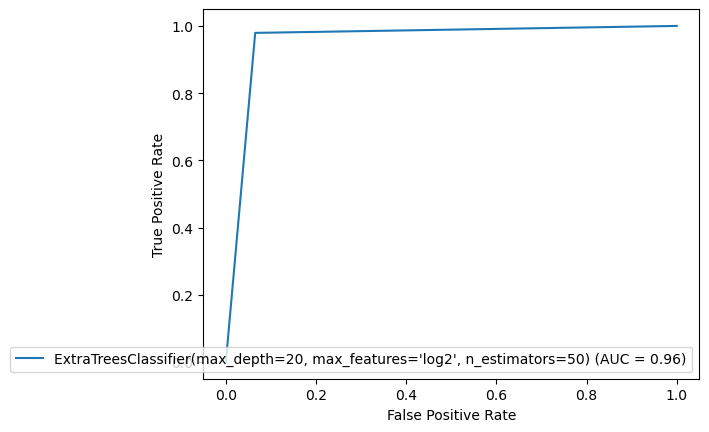

In [91]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name = Final_model)
display.plot()

#### Here we have plotted the ROC curve for the best model and the AUC score is 96%

### Saving the model

In [93]:
import joblib
joblib.dump(Final_model, "redwine_quality_analysis.pkl")

['redwine_quality_analysis.pkl']

## Predicting the saved model

In [94]:
model = joblib.load('redwine_quality_analysis.pkl')

prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

These are the predicted quality values.

In [95]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

Predicted  Original
0            0         0
1            1         1
2            1         1
3            1         1
4            1         0
..         ...       ...
750          1         1
751          1         1
752          0         0
753          1         1
754          1         1

[755 rows x 2 columns]